In [1]:
import nltk
import textstat
import docx2txt
import pandas as pd
import numpy as np
from collections import Counter
import string

In [2]:
from docx import Document
import glob
import os

def renamer(ext):
    i = 1
    for filename in [glob.iglob(f'./*.docx')]:
        os.rename(filename, str(i))
        i += 1
    return None


In [3]:
def essay_ext(filepath):
    document = Document(filepath)
    essay_one = []
    for para in document.paragraphs:
        if para != '':
            essay_one.append(para.text)
    return '\n'.join(essay_one)

In [4]:
def counter_words(essay):
    tokens = nltk.word_tokenize(essay.lower())
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags if word not in string.punctuation)
    return counts

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

def sentiment(x):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(x)
    

In [6]:
#     for filepath in glob.iglob('./*.docx'):
import textstat
def testessaystat(test_data):
    flesch = textstat.flesch_reading_ease(test_data)
    smog = textstat.smog_index(test_data)
    flesch_kin = textstat.flesch_kincaid_grade(test_data)
    coleman = textstat.coleman_liau_index(test_data)
    ari = textstat.automated_readability_index(test_data)
    dcrs = textstat.dale_chall_readability_score(test_data)
    dw = textstat.difficult_words(test_data)
    lwf = textstat.linsear_write_formula(test_data)
    gf = textstat.gunning_fog(test_data)
    ts = textstat.text_standard(test_data, float_output = True)
    return {'flesch':flesch, 'smog': smog, 'coleman': coleman, 'ari': ari, 'dcrs': dcrs, 'dw': dw, 'lwf': lwf, 'gf': gf, 'ts':ts }

In [7]:
import language_tool_python

def check_grammar(text):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(text)
    return {'N mistakes':len(matches)}

In [8]:
def filename(filepath):
    return {'Essay': os.path.splitext(filepath)[0]}

In [9]:
def scoring(filepath):
    x = os.path.splitext(filepath)[0]
    if int(x) <= 10:
        return {'Score_band': 9}
    elif int(x) <= 15:
        return {'Score_band': 8}
    elif int(x) <= 20:
        return {'Score_band': 7}
    elif int(x) <= 25:
        return {'Score_band': 6}
    elif int(x) <= 30:
        return {'Score_band': 5}

In [11]:
db = pd.DataFrame()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

list_dict = []

for filepath in glob.iglob('*.docx'):
    ee = essay_ext(filepath)
    fn = filename(filepath)
    tes = testessaystat(ee)
    chg = check_grammar(ee)
    st = sentiment(ee)
    cw = counter_words(ee)
    score = scoring(filepath)
    base_dic = {**fn, **tes, **chg, **st, **cw, **score}
    list_dict.append(base_dic)

df = pd.DataFrame([i for i in list_dict])

df.to_csv('dataset.csv', index=False)

print(df)
# надо сделать порядок в датафрейм, нужно сделать так что бы последовательность оставалась!!!

   Essay  flesch  smog  coleman   ari  dcrs  dw        lwf     gf    ts  \
0     11   37.03  16.2    12.89  16.1  8.47  81  13.800000  16.26  16.0   
1      1   51.18  13.3    13.29  14.0  8.05  65  13.600000  12.53  14.0   
2     27   67.89  11.5     9.86  11.2  6.80  36   8.000000  10.67   9.0   
3     26   63.12  13.0     8.71  12.2  7.11  46  15.250000  12.80  13.0   
4     30   74.19  10.1    11.30   9.8  6.68  52   4.181818   9.04   7.0   
5     10   39.77  13.7    13.52  15.2  8.33  72  13.800000  13.79  14.0   
6     21   63.49  13.1    13.28  12.3  7.87  60  12.333333  11.55   8.0   
7     17   57.40  13.9    11.89  13.9  7.23  42   7.250000  13.09  14.0   
8      7   58.42  13.3    12.65  14.0  7.95  57  11.333333  12.68  13.0   
9      6   55.37  12.5    12.19  14.8  7.49  53  12.000000  12.47  12.0   
10    16   57.40  13.0    13.18  14.6  7.80  56  10.500000  12.34  11.0   
11    20   69.41  11.2    11.89  12.3  7.59  75   6.625000  10.24   8.0   
12    23   84.20   8.6   

In [37]:
print(base_dic)

{'Essay': '28', 'flesch': 66.27, 'smog': 12.7, 'coleman': 11.08, 'ari': 12.9, 'dcrs': 6.9, 'dw': 36, 'lwf': 13.0, 'gf': 11.02, 'ts': 13.0, 'N mistakes': 2, 'neg': 0.017, 'neu': 0.764, 'pos': 0.218, 'compound': 0.9947, 'RB': 9, 'NNS': 25, 'IN': 33, 'TO': 7, 'VB': 11, 'PRP$': 10, 'NN': 48, 'VBG': 7, 'DT': 23, 'JJS': 0, 'CC': 0, 'PRP': 12, 'VBP': 11, 'JJ': 28, 'WP': 1, 'MD': 4, 'WRB': 0, 'JJR': 4, 'VBZ': 9, 'WDT': 0, 'VBN': 1, 'RBS': 0, 'EX': 1, 'CD': 1, 'POS': 0, 'Score_band': 5, 'RBR': 0, 'PDT': 0, 'RP': 0, 'NNPS': 0, 'WP$': 0, 'UH': 0}


In [12]:
df = pd.read_csv('dataSet.csv')
df = pd.DataFrame(df)

print(df)

    Essay  flesch  smog  coleman   ari  dcrs  dw        lwf     gf    ts  \
0      11   37.03  16.2    12.89  16.1  8.47  81  13.800000  16.26  16.0   
1       1   51.18  13.3    13.29  14.0  8.05  65  13.600000  12.53  14.0   
2      27   67.89  11.5     9.86  11.2  6.80  36   8.000000  10.67   9.0   
3      26   63.12  13.0     8.71  12.2  7.11  46  15.250000  12.80  13.0   
4      30   74.19  10.1    11.30   9.8  6.68  52   4.181818   9.04   7.0   
5      10   39.77  13.7    13.52  15.2  8.33  72  13.800000  13.79  14.0   
6      21   63.49  13.1    13.28  12.3  7.87  60  12.333333  11.55   8.0   
7      17   57.40  13.9    11.89  13.9  7.23  42   7.250000  13.09  14.0   
8       7   58.42  13.3    12.65  14.0  7.95  57  11.333333  12.68  13.0   
9       6   55.37  12.5    12.19  14.8  7.49  53  12.000000  12.47  12.0   
10     16   57.40  13.0    13.18  14.6  7.80  56  10.500000  12.34  11.0   
11     20   69.41  11.2    11.89  12.3  7.59  75   6.625000  10.24   8.0   
12     23   

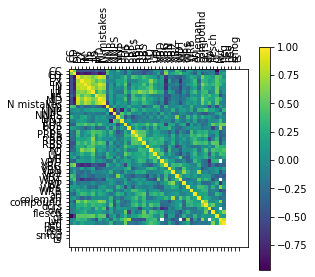

Index(['CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'N mistakes',
       'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR',
       'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT',
       'WP', 'WP$', 'WRB', 'ari', 'coleman', 'compound', 'dcrs', 'dw',
       'flesch', 'gf', 'lwf', 'neg', 'neu', 'pos', 'smog', 'ts'],
      dtype='object')


In [48]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.xticks(np.arange(len(df.columns.difference(['Essay', 'Score_band']))), df.columns.difference(['Essay', 'Score_band']), rotation=90)
plt.yticks(np.arange(len(df.columns.difference(['Essay', 'Score_band']))), df.columns.difference(['Essay', 'Score_band']), rotation=0)
plt.colorbar()
plt.show()
print()

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(df[df.columns.difference(['Essay', 'Score_band'])])
Y = np.asarray(df['Score_band'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.0999221438175053
Weights:  [ 0.04720957  0.08814362  0.04712888 -0.01192946 -0.04683748 -0.00337492
  0.0449495  -0.12375116  0.19277956 -0.06077863 -0.03845113  0.05122164
  0.00673038  0.0084356  -0.01628204 -0.00606681 -0.0999532   0.05920119
 -0.08665306  0.04722853  0.10401492  0.01431094 -0.04937027 -0.03809206
  0.04213196 -0.0029143   0.10521597  0.07469481  0.0333821   0.1727933
 -0.14962588  0.05756474 -0.01167369 -0.00477164 -0.02335353 -0.00728476
  0.08286314 -0.02863694  0.02525059 -0.07979844 -0.03110454 -0.14512964
 -0.00551429  0.00965858 -0.0040645  -0.01626678  0.00858567]


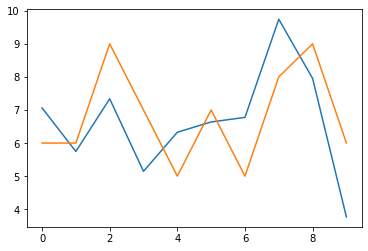

In [15]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(np.nan_to_num(X_train), np.nan_to_num(y_train))
print('Score: ', lineReg.score(np.nan_to_num(X_test), np.nan_to_num(y_test)))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(np.nan_to_num(X_test)))
plt.plot(np.nan_to_num(y_test))
plt.show()

Score:  -0.18808885107823126
Weights:  [ 0.03803281  0.0939714   0.04950524  0.00266131 -0.04617251  0.00360375
  0.03902307 -0.1210509   0.19045181 -0.0570831  -0.03215673  0.04695474
  0.00173818  0.01140182 -0.02439198 -0.00368927 -0.09479077  0.06442685
 -0.06665141  0.03612108  0.10326737  0.00897575 -0.04768289 -0.03600048
  0.03353471 -0.01765702  0.10897872  0.08392213  0.03999964  0.15762267
 -0.14230056  0.06514008 -0.01076899 -0.0003933  -0.05211103 -0.01366375
  0.07637604 -0.01545427  0.01545339 -0.09260383 -0.01060868 -0.12389119
 -0.00556079  0.00961805 -0.00399133 -0.04068132 -0.00457082]


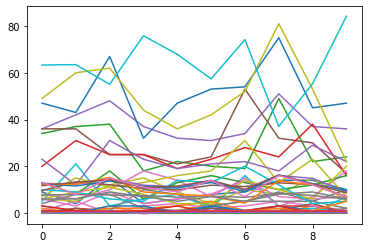

In [16]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(np.nan_to_num(X_train), np.nan_to_num(y_train))
print('Score: ', reg.score(np.nan_to_num(X_test), np.nan_to_num(y_test)))
print('Weights: ', reg.coef_)

plt.plot(np.nan_to_num(X_test))
plt.plot(np.nan_to_num(y_test))
plt.show()

In [56]:
filepath = 'text.docx'
ee = essay_ext(filepath)
tes = testessaystat(ee)
chg = check_grammar(ee)
st = sentiment(ee)
cw = counter_words(ee)
test_essay = {**tes, **chg, **st, **cw}



# надо сделать функцию по обработке вход данных с возвратом листа в нужной последовательности

In [57]:
print(base_dic)

{'Essay': '28', 'flesch': 66.27, 'smog': 12.7, 'coleman': 11.08, 'ari': 12.9, 'dcrs': 6.9, 'dw': 36, 'lwf': 13.0, 'gf': 11.02, 'ts': 13.0, 'N mistakes': 2, 'neg': 0.017, 'neu': 0.764, 'pos': 0.218, 'compound': 0.9947, 'RB': 9, 'NNS': 25, 'IN': 33, 'TO': 7, 'VB': 11, 'PRP$': 10, 'NN': 48, 'VBG': 7, 'DT': 23, 'JJS': 0, 'CC': 0, 'PRP': 12, 'VBP': 11, 'JJ': 28, 'WP': 1, 'MD': 4, 'WRB': 0, 'JJR': 4, 'VBZ': 9, 'WDT': 0, 'VBN': 1, 'RBS': 0, 'EX': 1, 'CD': 1, 'POS': 0, 'Score_band': 5, 'RBR': 0, 'PDT': 0, 'RP': 0, 'NNPS': 0, 'WP$': 0, 'UH': 0}


In [58]:
for v in df.columns:
    if v not in test_essay and v not in ['Essay', 'Score_band']:
        test_essay[v] = 0
for n in test_essay:
    if v not in df.columns:
        test_essay.pop('n')

In [59]:
# essay_t = [*test_essay.values()]
sorted_dict = {}
for i in list(df.columns.difference(['Essay', 'Score_band'])):
    for k in list(test_essay.keys()):
        if k == i:
            sorted_dict[k] = test_essay[k]
            break

print(sorted_dict)
essay_t = [*sorted_dict.values()]
# print(test_essay)
# print(list(df.columns))


{'CC': 12, 'CD': 0, 'DT': 20, 'EX': 1, 'IN': 36, 'JJ': 27, 'JJR': 0, 'JJS': 1, 'MD': 7, 'N mistakes': 7, 'NN': 52, 'NNP': 0, 'NNPS': 0, 'NNS': 42, 'PDT': 0, 'POS': 0, 'PRP': 8, 'PRP$': 5, 'RB': 9, 'RBR': 0, 'RBS': 0, 'RP': 1, 'TO': 9, 'UH': 0, 'VB': 17, 'VBD': 0, 'VBG': 14, 'VBN': 7, 'VBP': 9, 'VBZ': 11, 'WDT': 1, 'WP': 0, 'WP$': 0, 'WRB': 0, 'ari': 9.2, 'coleman': 10.72, 'compound': 0.9779, 'dcrs': 7.56, 'dw': 60, 'flesch': 66.64, 'gf': 8.15, 'lwf': 5.444444444444445, 'neg': 0.035, 'neu': 0.832, 'pos': 0.133, 'smog': 10.2, 'ts': 8.0}


In [60]:
reg.predict([essay_t])

array([8.30546499])